In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

# Load the dataset
file_path = "..\..\data\smoking-drinking\smoking_driking_dataset_Ver01.csv"
df = pd.read_csv(file_path)

# Feature list to process
features = [
    "sex", "age", "height", "weight", "waistline", "sight_left", "sight_right", "hear_left", 
    "hear_right", "SBP", "DBP", "BLDS", "tot_chole", "HDL_chole", "LDL_chole", "triglyceride", 
    "hemoglobin", "urine_protein", "serum_creatinine", "SGOT_AST", "SGOT_ALT", "gamma_GTP", 
    "SMK_stat_type_cd", "DRK_YN"
]

# Filter dataset to include only the relevant features
df = df[features]

# Preprocessing pipeline
def preprocess_data(data):
    # Step 1: Handle missing values
    print("Handling missing values...")
    imputer = SimpleImputer(strategy='mean')  # Use mean for numerical columns
    categorical_imputer = SimpleImputer(strategy='most_frequent')  # Mode for categorical columns

    # Separate numerical and categorical columns
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    categorical_cols = data.select_dtypes(include=['object']).columns

    # Impute missing values
    data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
    data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

    # Step 2: Handle outliers using Z-score
    print("Handling outliers...")
    z_threshold = 3
    z_scores = data[numerical_cols].apply(zscore)  # Compute Z-scores for all numerical columns
    data = data[(abs(z_scores) < z_threshold).all(axis=1)]  # Retain rows where all Z-scores are within the threshold
    print("Shape after outlier removal:", data.shape)


    # Step 3: Encode categorical variables
    print("Encoding categorical variables...")
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le  # Save encoders for potential inverse transforms

    # Step 4: Standardize numerical features
    print("Standardizing numerical features...")
    scaler = StandardScaler()
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    orignial_data = data.copy()

    # Step 5: Apply PCA for dimensionality reduction
    print("Applying PCA...")
    pca = PCA(n_components=0.95)  # Retain 95% variance
    pca_features = pca.fit_transform(data[numerical_cols])

    # Replace numerical columns with PCA-transformed features
    pca_columns = [f"PCA_{i+1}" for i in range(pca_features.shape[1])]
    pca_df = pd.DataFrame(pca_features, columns=pca_columns)

    # Combine PCA-transformed features with categorical features
    final_data = pd.concat([pca_df.reset_index(drop=True), data[categorical_cols].reset_index(drop=True)], axis=1)

    return final_data

# Apply preprocessing
df = preprocess_data(df)

# Display the preprocessed DataFrame
print("Preprocessing completed. Final DataFrame:")
print(df.head())

# Save the preprocessed DataFrame to a CSV file (optional)
df.to_csv("preprocessed_data.csv", index=False)

<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Erlend Sæveraas\AppData\Local\Temp\ipykernel_34600\203952375.py:9: SyntaxWarning: invalid escape sequence '\.'
  file_path = "..\..\data\smoking-drinking\smoking_driking_dataset_Ver01.csv"


Handling missing values...
Handling outliers...
Shape after outlier removal: (846398, 24)
Encoding categorical variables...


C:\Users\Erlend Sæveraas\AppData\Local\Temp\ipykernel_34600\203952375.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\Erlend Sæveraas\AppData\Local\Temp\ipykernel_34600\203952375.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])


Standardizing numerical features...


C:\Users\Erlend Sæveraas\AppData\Local\Temp\ipykernel_34600\203952375.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


Applying PCA...
Preprocessing completed. Final DataFrame:
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0  2.025544 -0.839784  0.093497 -0.391787 -0.352669  0.355572 -0.164468   
1  2.922318 -1.236869  1.051027 -1.166578 -0.399198  0.857755 -0.183687   
2  2.176327 -1.141228 -1.773216  2.290390  0.892830 -0.814453 -0.163571   
3  2.788370 -0.955241  0.200883 -0.923216  1.914884  1.290956 -0.225850   
4 -0.394487  0.184766  0.225146 -1.362446  1.285946 -0.096540 -0.117903   

      PCA_8     PCA_9    PCA_10    PCA_11    PCA_12    PCA_13    PCA_14  \
0 -0.800276 -0.820335 -0.132950 -0.989938 -0.346889  0.523006  1.393215   
1 -0.007633 -0.208420 -0.902020 -0.591838  1.065905 -0.207177 -0.626641   
2 -0.860071 -0.888167  0.363757  0.057846 -0.152175  0.582983  0.951937   
3 -0.473241 -1.610877  0.626448 -0.055571 -0.877178 -1.404855  1.232052   
4  0.100565 -0.316057 -0.071800 -0.052944 -0.232403  0.185553  0.093275   

     PCA_15  sex  DRK_YN  
0 -0.471360  

In [21]:

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
compressed_features = pd.read_csv("preprocessed_data.csv")

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(compressed_features)

# GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(compressed_features)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(compressed_features)

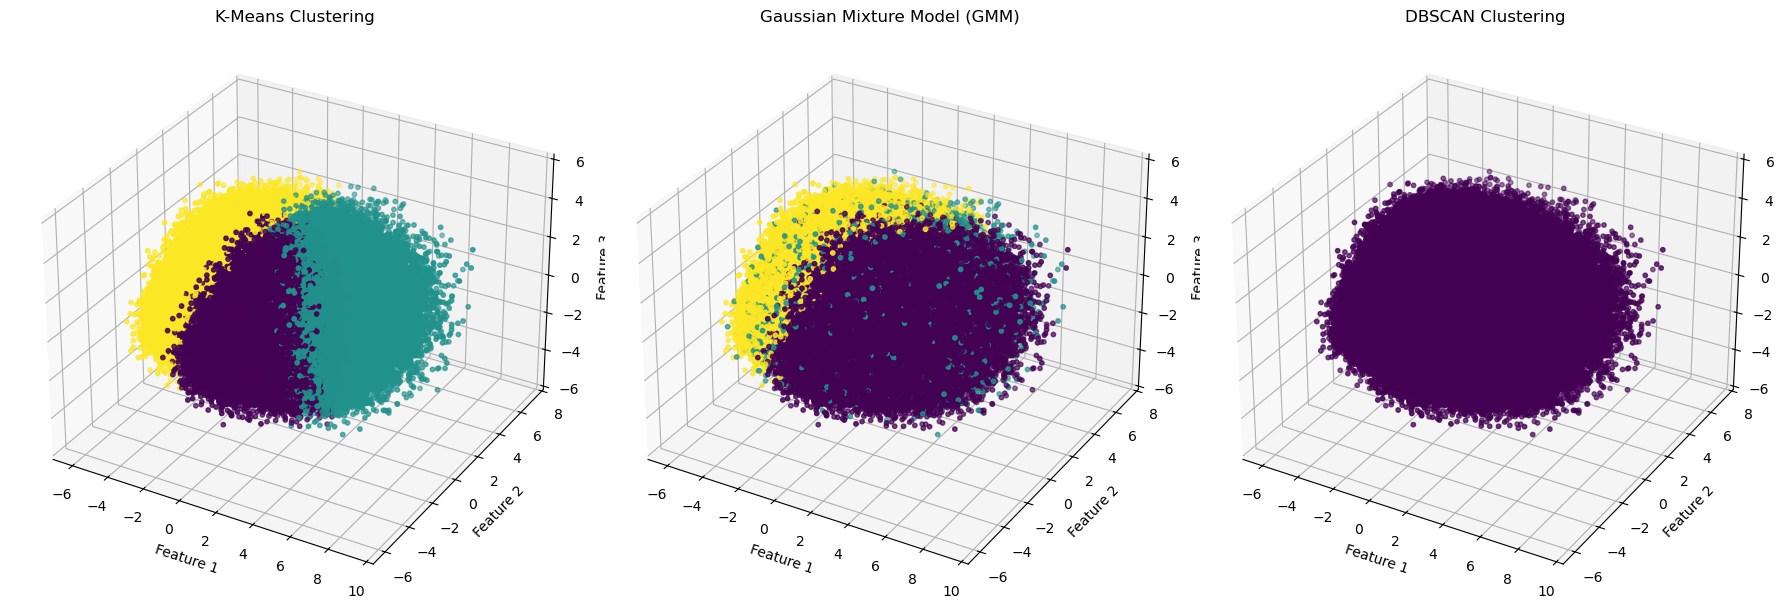

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3D scatter plot for clustering results
fig = plt.figure(figsize=(18, 6))

# K-Means plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(
    compressed_features.iloc[:, 0],
    compressed_features.iloc[:, 1],
    compressed_features.iloc[:, 2],
    c=kmeans_labels,
    cmap='viridis',
    s=10
)
ax1.set_title("K-Means Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_zlabel("Feature 3")

# GMM plot
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(
    compressed_features.iloc[:, 0],
    compressed_features.iloc[:, 1],
    compressed_features.iloc[:, 2],
    c=gmm_labels,
    cmap='viridis',
    s=10
)
ax2.set_title("Gaussian Mixture Model (GMM)")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_zlabel("Feature 3")

# DBSCAN plot
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(
    compressed_features.iloc[:, 0],
    compressed_features.iloc[:, 1],
    compressed_features.iloc[:, 2],
    c=dbscan_labels,
    cmap='viridis',
    s=10
)
ax3.set_title("DBSCAN Clustering")
ax3.set_xlabel("Feature 1")
ax3.set_ylabel("Feature 2")
ax3.set_zlabel("Feature 3")

plt.tight_layout()
plt.show()

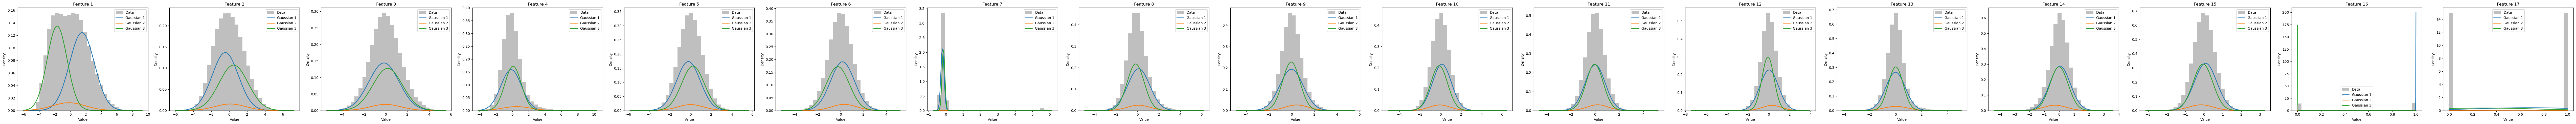

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fit the GMM model (already done in your case)
# gmm = GaussianMixture(n_components=3, random_state=42)
# gmm.fit(compressed_features)

# Extract parameters
means = gmm.means_  # Means of each component
covariances = gmm.covariances_  # Covariances of each component
weights = gmm.weights_  # Weights of each component
n_features = compressed_features.shape[1]

# Plot Gaussian components for each feature
fig, axes = plt.subplots(1, n_features, figsize=(6 * n_features, 5))

for i, ax in enumerate(axes):
    # Plot the histogram of the feature
    feature_data = compressed_features.iloc[:, i]
    ax.hist(feature_data, bins=30, density=True, alpha=0.5, color='gray', label='Data')

    # Overlay Gaussian curves
    x = np.linspace(feature_data.min(), feature_data.max(), 500)
    for j in range(gmm.n_components):
        mean = means[j, i]
        variance = covariances[j, i, i] if covariances.ndim == 3 else covariances[j]
        stddev = np.sqrt(variance)
        y = weights[j] * norm.pdf(x, mean, stddev)
        ax.plot(x, y, label=f'Gaussian {j + 1}', linewidth=2)

    # Formatting
    ax.set_title(f"Feature {i + 1}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Step 4: Add the GMM labels back to the original dataset
data['Cluster'] = gmm_labels  # Adding the labels as a new column

# Step 5: Visualize the clustering results on the original data
# For 2D plot: Choose two features for x and y
plt.figure(figsize=(8, 6))
plt.scatter(orignial_data.iloc[:, 0], orignial_data.iloc[:, 1], c=gmm_labels, cmap='viridis', s=10)
plt.title("Clustering of Original Data with GMM Labels")
plt.xlabel(orignial_data.columns[0])
plt.ylabel(orignial_data.columns[1])
plt.colorbar(label='Cluster Label')
plt.show()

# For 3D plot: Choose three features for x, y, and z
# Install mpl_toolkits if not already installed
%pip install mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(orignial_data.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],
           c=gmm_labels, cmap='viridis', s=10)
ax.set_title("Clustering of Original Data (3D)")
ax.set_xlabel(orignial_data.columns[0])
ax.set_ylabel(orignial_data.columns[1])
ax.set_zlabel(orignial_data.columns[2])
plt.show()

NameError: name 'final_data' is not defined